# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Loading and Visualizing Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Covid-SymptomChecker.csv to Covid-SymptomChecker.csv


In [ ]:
import io
corona_pd=pd.read_csv(io.BytesIO(uploaded['Covid-SymptomChecker.csv']))
corona_pd.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
171102,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,Spain
6344,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,China
72497,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,Iran
53701,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,Italy
189108,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,Spain


In [ ]:
#To remove the columns of the DataFrame in memory.
corona_pd.drop(["Country"],axis=1,inplace=True)
corona_pd.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
254807,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
97883,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
7608,0,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
165471,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
35741,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
#Returns the sum of null values under each column.
corona_pd.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

In [ ]:
#To check whether the row contains duplicate values or not.
corona_pd.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
316795     True
316796     True
316797     True
316798     True
316799     True
Length: 316800, dtype: bool

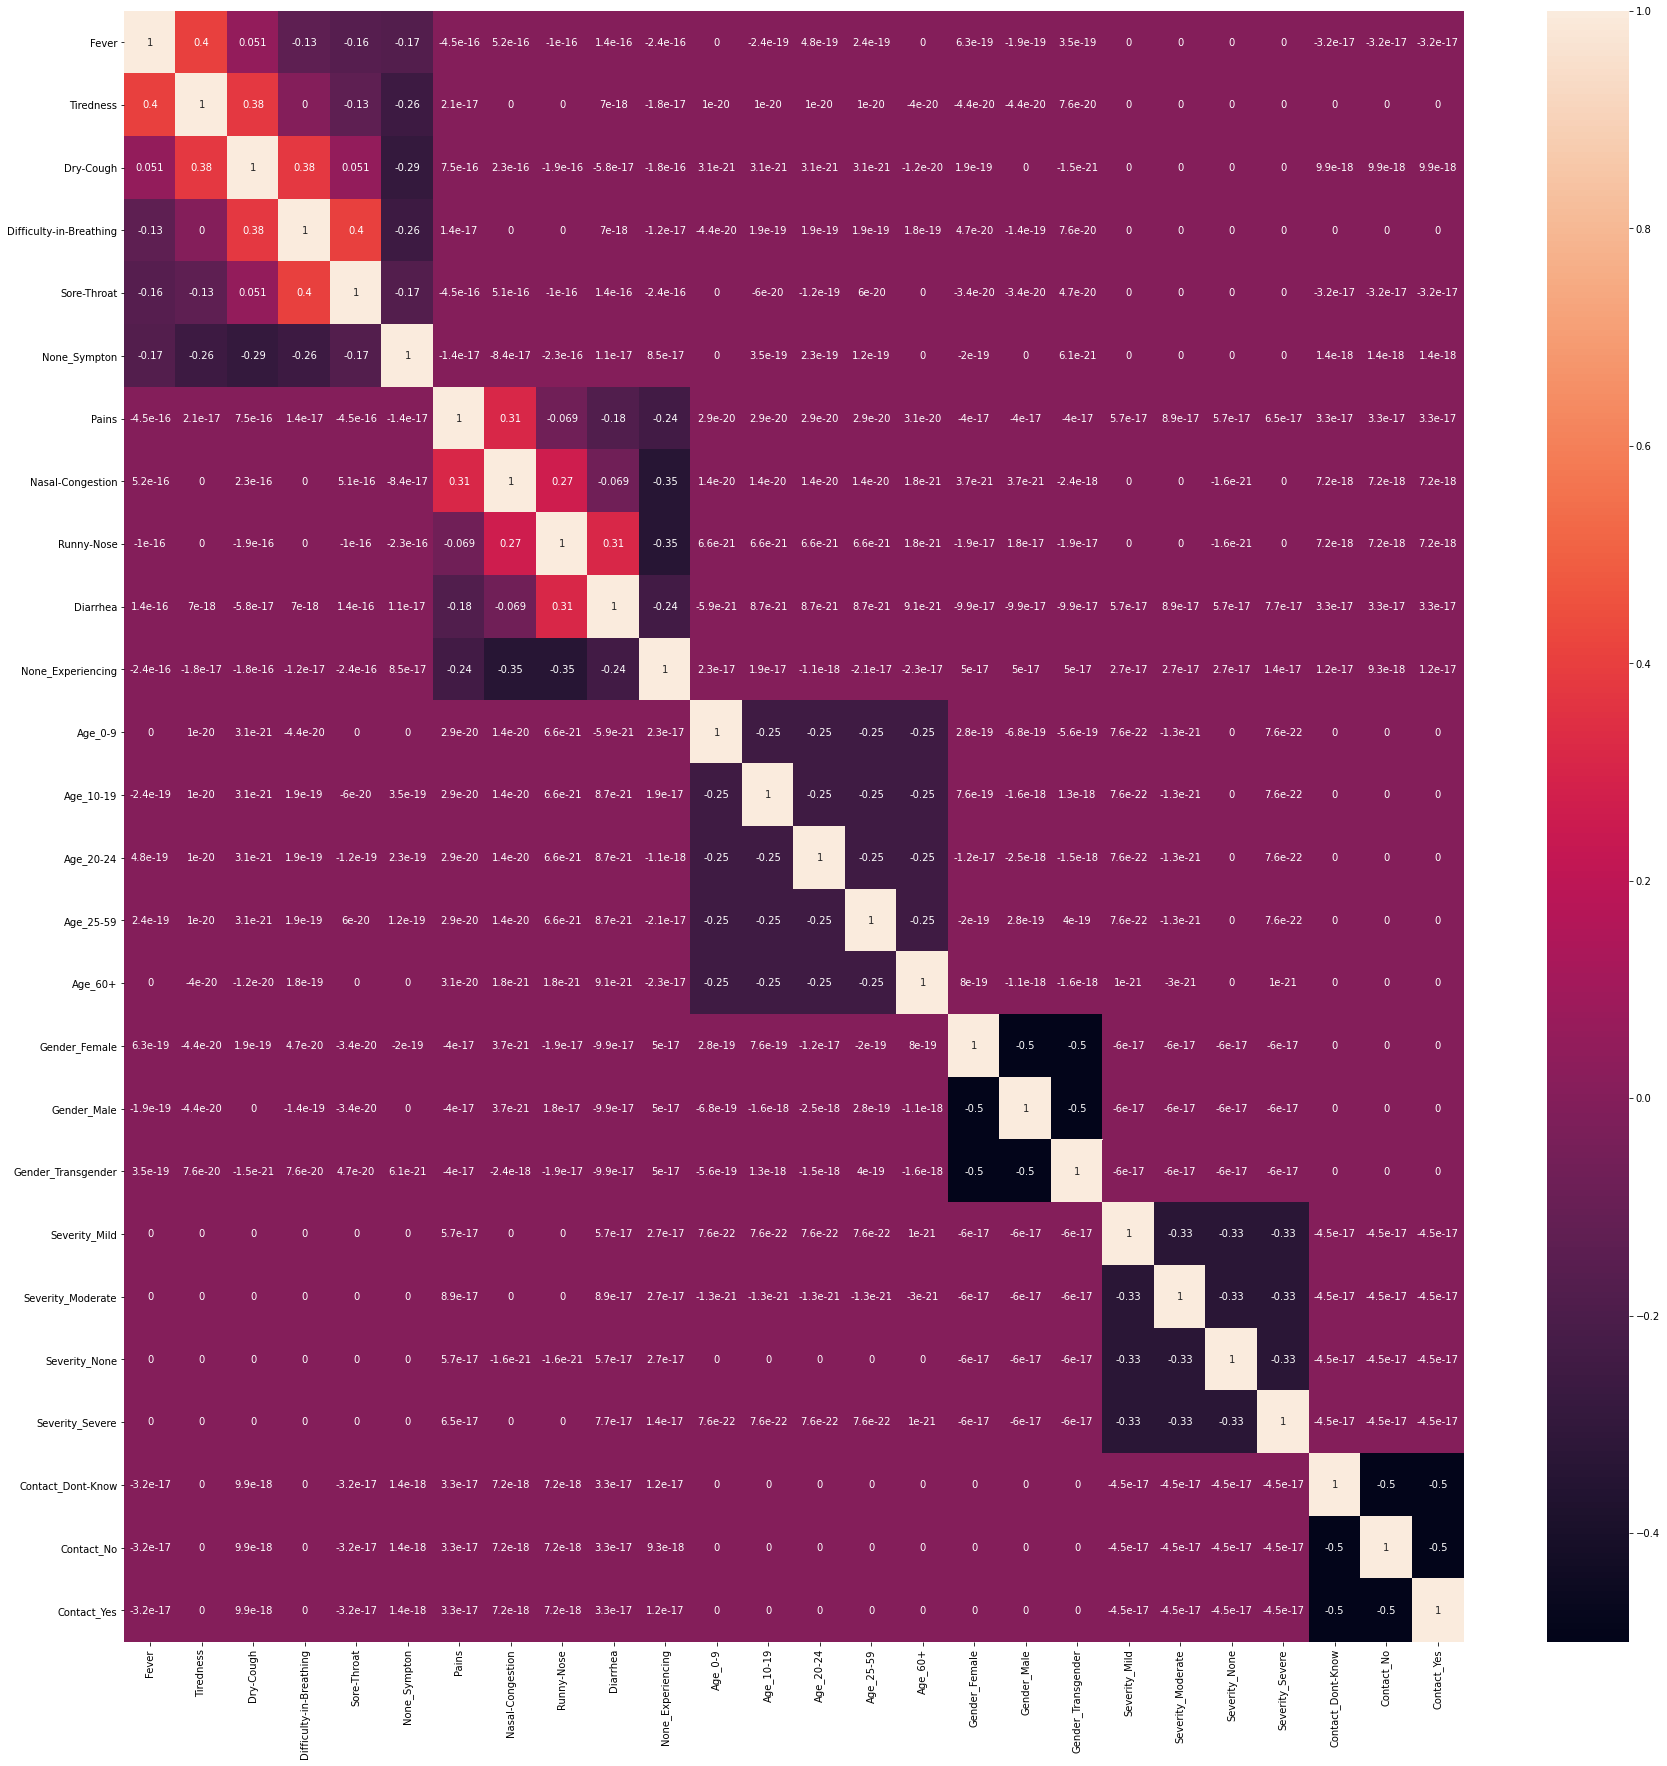

In [ ]:
#To plot a correlation matrix between features.
f,ax= plt.subplots(figsize=(30,30))
sns.heatmap(corona_pd.corr(),annot=True)

**You can see from the above visualization that each feature has a effect on other features**

# **Elbow Method**
Used to find optimal number of clusters

In [ ]:
#To scale the values along columns.
scaler= StandardScaler()
corona_pd_scaled=scaler.fit_transform(corona_pd)


In [ ]:
#To get the Within Cluster Sum of Squares(WCSS) for each cluster count to find the optimal K value(i.e cluster count).
scores=[]
for i in range(1,20):
    corona_means=KMeans(n_clusters=i)
    corona_means.fit(corona_pd_scaled)
    scores.append(corona_means.inertia_)

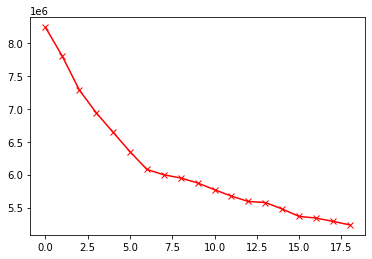

In [ ]:
#Plotting the values obtained to get the optimal K-value.
plt.plot(scores,"-rx")

**At point 7 ,the graph looks like a elbow. So we choose this as our K value**

# **K-MEANS Implementation**

In [ ]:
#Applying K-means algorithm with the obtained K value.
corona_means=KMeans(n_clusters=7)
corona_means.fit(corona_pd_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Returns an array with cluster labels to which it belongs.
labels=corona_means.labels_

In [ ]:
#Creating a Dataframe with cluster centres(The example which is taken as center for each cluster)-If you are not familiar ,learn about k-means through the link given at last.
corona_pd_m=pd.DataFrame(corona_means.cluster_centers_,columns=corona_pd.columns)
corona_pd_m

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,-7.559289e-01,-1.095445e+00,-1.095445e+00,-7.559289e-01,3.162278e+00,-6.580078e-17,8.924773e-21,8.924773e-21,6.447331e-18,1.410946e-17,2.875545e-15,-9.042608e-16,-9.035192e-16,-2.677432e-20,-8.924773e-21,-7.399702e-17,-8.924773e-21,7.401487e-17,7.401487e-17,7.401487e-17
1,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,-5.000000e-01,3.333333e-01,3.333333e-01,3.333333e-01,-5.000000e-01,-7.071068e-01,-7.071068e-01,1.414214e+00,-1.443851e-20,-4.812836e-21,-7.400524e-17,-4.812836e-21,7.401487e-17,7.401487e-17,7.401487e-17
2,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.305808e-16,-3.227034e-16,4.304806e-16,5.379325e-17,5.384329e-16,-6.310784e-17,1.191527e-20,1.191527e-20,8.660300e-18,1.141203e-17,2.224717e-15,-2.150104e-16,-2.146277e-16,-3.574582e-20,-1.191527e-20,-7.399104e-17,-1.191527e-20,7.401487e-17,7.401487e-17,7.401487e-17
3,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,-5.000000e-01,3.333333e-01,3.333333e-01,3.333333e-01,-5.000000e-01,1.414214e+00,-7.071068e-01,-7.071068e-01,-1.443851e-20,-4.812836e-21,-7.400524e-17,-4.812836e-21,7.401487e-17,7.401487e-17,7.401487e-17
4,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,-5.000000e-01,3.333333e-01,3.333333e-01,3.333333e-01,-5.000000e-01,-7.071068e-01,1.414214e+00,-7.071068e-01,-1.443851e-20,-4.812836e-21,-7.400524e-17,-4.812836e-21,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,2.000000e+00,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,3.271621e-17,1.084200e-14,1.084271e-14,-1.443851e-20,-4.812836e-21,-7.400524e-17,-4.812836e-21,7.401487e-17,7.401487e-17,7.401487e-17
6,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,2.000000e+00,3.271621e-17,1.084200e-14,1.084271e-14,-1.443851e-20,-4.812836e-21,-7.400524e-17,-4.812836e-21,7.401487e-17,7.401487e-17,7.401487e-17


**It's clear from the above table that the people at cluster 4 are not affected with corona while other clusters do affected with corona. The other clusters can also be classified. Have a close look you can find difference between the clusters**

In [ ]:
#Concatenating the cluster labels.
corona_cluster=pd.concat([corona_pd,pd.DataFrame({"Cluster":labels})],axis=1)
corona_cluster.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
2576,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,5
161451,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,5
214959,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1
251898,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,6
310739,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,6


# **Principal Component Analysis (PCA)**
Used to perform dimentionality reduction to have a better view of clusters of examples.

In [ ]:
#Implementing pca with 3 components i.e 3d plot
corona_pca=PCA(n_components=3)
principal_comp=corona_pca.fit_transform(corona_pd_scaled)

In [ ]:
principal_comp=pd.DataFrame(principal_comp,columns=['pca1','pca2','pca3'])
principal_comp.head()

,pca1,pca2,pca3
0,-1.980803,-1.792874,0.287054
1,-1.952749,-1.884180,1.167567
2,-1.991966,-1.771787,0.046964
3,-2.046205,-1.739669,0.007814
4,-2.018151,-1.830975,0.888327


In [ ]:
principal_comp=pd.concat([principal_comp,pd.DataFrame({"Cluster":labels})],axis=1)
principal_comp.sample(5)

,pca1,pca2,pca3,Cluster
256306,-1.420167,-0.357225,2.116369,5
132813,1.159535,-1.161207,0.881058,5
94877,1.057627,0.478079,0.326091,6
216145,-1.654009,-0.575273,1.804139,6
274361,1.067880,-0.476506,0.496834,4


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


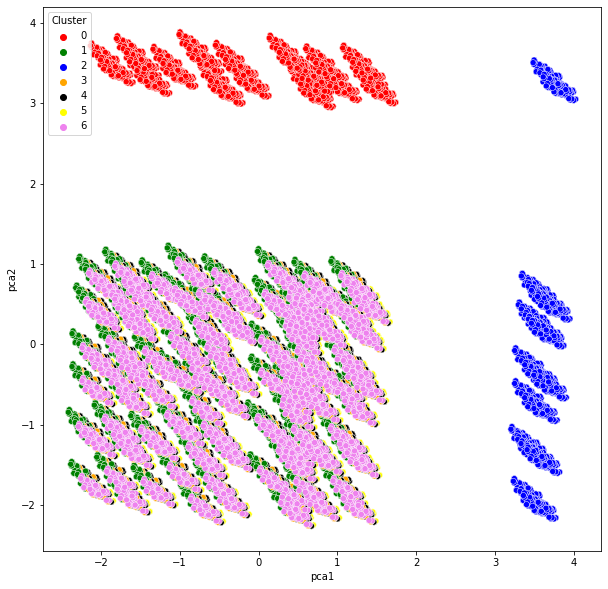

In [ ]:
#Plotting the 2d-plot.
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=principal_comp ,palette=['red','green','blue','orange','black','yellow','violet'])
plt.show()

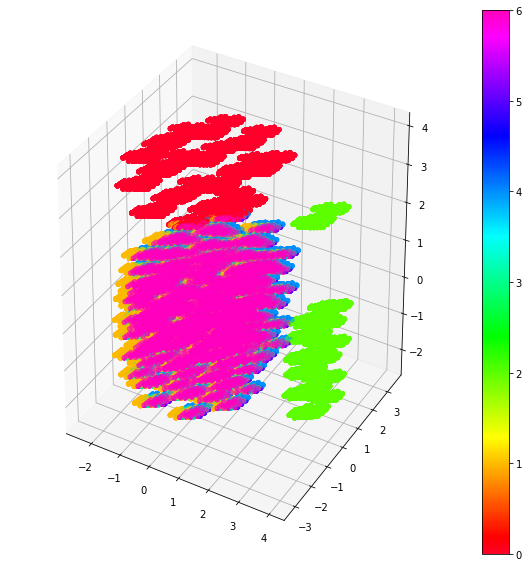

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=principal_comp['pca1'],ys=principal_comp['pca3'],zs=principal_comp['pca2'],c=principal_comp['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()

# **Hirearchial Clustering Using Dendogram**

In [ ]:
import numpy as np 
import pandas as pd
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Covid-SymptomChecker.csv to Covid-SymptomChecker (1).csv


In [ ]:
train = pd.read_csv(io.BytesIO(uploaded['Covid-SymptomChecker.csv']))
train.head()


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China


In [ ]:
train.drop(["Country"],axis=1,inplace=True)
train.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
163030,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
309305,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
225962,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
184284,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
16437,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
data = train.iloc[0:30000,0:5]
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat
0,0.447214,0.447214,0.447214,0.447214,0.447214
1,0.447214,0.447214,0.447214,0.447214,0.447214
2,0.447214,0.447214,0.447214,0.447214,0.447214
3,0.447214,0.447214,0.447214,0.447214,0.447214
4,0.447214,0.447214,0.447214,0.447214,0.447214


In [ ]:
import sys
print (sys.getrecursionlimit())



1000


In [ ]:
sys.setrecursionlimit(10000)

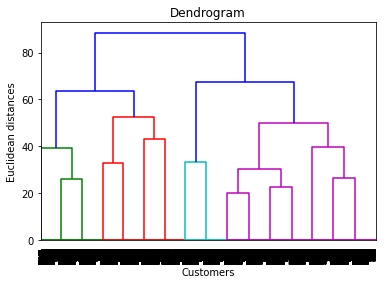

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward' ))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting the hierarchical clustering to dataset


from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(data_scaled)

# Visualising the clusters


 **We can see Two Favourable Clusters**